<a href="https://colab.research.google.com/github/Kishorecit/Dog-vs-cat-image-classification-using-cnn/blob/main/Copy_of_dog_vs_cat_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip



--2023-12-21 14:02:21--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.35.254.14, 2600:1407:7400:584::317f, 2600:1407:7400:585::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.35.254.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip.1’

kagglecatsanddogs_5 100%[===================>] 786.67M   114MB/s    in 5.2s    

2023-12-21 14:02:26 (151 MB/s) - ‘kagglecatsanddogs_5340.zip.1’ saved [824887076/824887076]



##download dataset

###

#unzip the dataset


In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

#import modules


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

creating dataframe for input and output


In [ ]:
input_path=[]
label=[]

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name =='Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", class_name,path))
print(input_path[0],label[0])

PetImages/Cat/4458.jpg 0


In [ ]:
df=pd.DataFrame()
df['images']=input_path
df['label']=label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Cat/9859.jpg,0
1,PetImages/Dog/5519.jpg,1
2,PetImages/Cat/982.jpg,0
3,PetImages/Dog/1018.jpg,1
4,PetImages/Dog/2083.jpg,1


In [ ]:
for i in df['images']:
  if '.jpg' not in i:
    print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [ ]:
import PIL
l=[]
for image in df['images']:
  try:
    img=PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Dog/11702.jpg', 'PetImages/Cat/666.jpg']

In [ ]:
#delete db files
df=df[df['images']!='PetImages/Dog/Thumbs.db']
df=df[df['images']!='PetImages/Cat/Thumbs.db']
df=df[df['images']!='PetImages/Dog/11702.jpg']
df=df[df['images']!='PetImages/Cat/666.jpg']
len(df)

24998

Exploratory Data Analysis

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp=df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [ ]:
plt.figure(figsize=(25,25))
temp=df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title('Cat')
  plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

<Axes: ylabel='count'>

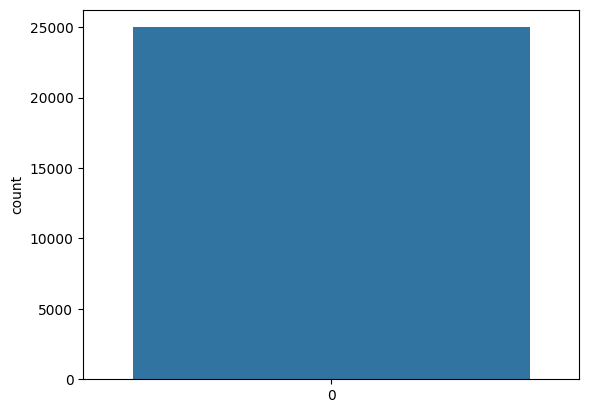

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

create DataGenerator for the Images


In [ ]:
df['label']=df['label'].astype('str')

In [ ]:
df.head()

,images,label
0,PetImages/Cat/9859.jpg,0
1,PetImages/Dog/5519.jpg,1
2,PetImages/Cat/982.jpg,0
3,PetImages/Dog/1018.jpg,1
4,PetImages/Dog/2083.jpg,1


In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
test.head()

,images,label
6870,PetImages/Dog/3757.jpg,1
22914,PetImages/Cat/2376.jpg,0
9671,PetImages/Dog/9726.jpg,1
13641,PetImages/Dog/8382.jpg,1
23341,PetImages/Cat/1111.jpg,0


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_generator =ImageDataGenerator(rescale=1./255)

train_iterator=train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)
val_iterator=val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'


)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


model creation

In [ ]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model =Sequential([
    Conv2D(16, (3,3),activation= 'relu',input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [ ]:
history= model.fit(train_iterator,epochs=10,validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 120s 3s/step - loss: 0.6955 - accuracy: 0.5679 - val_loss: 0.7368 - val_accuracy: 0.5546
Epoch 2/10
40/40 [==============================] - 115s 3s/step - loss: 0.6058 - accuracy: 0.6698 - val_loss: 0.5844 - val_accuracy: 0.6938
Epoch 3/10
40/40 [==============================] - 138s 3s/step - loss: 0.5710 - accuracy: 0.6988 - val_loss: 0.5528 - val_accuracy: 0.7250
Epoch 4/10
40/40 [==============================] - 139s 3s/step - loss: 0.5404 - accuracy: 0.7253 - val_loss: 0.5268 - val_accuracy: 0.7378
Epoch 5/10
40/40 [==============================] - 135s 3s/step - loss: 0.5097 - accuracy: 0.7499 - val_loss: 0.4830 - val_accuracy: 0.7720
Epoch 6/10
40/40 [==============================] - 120s 3s/step - loss: 0.4869 - accuracy: 0.7617 - val_loss: 0.5197 - val_accuracy: 0.7470
Epoch 7/10
40/40 [==============================] - 117s 3s/step - loss: 0.4762 - accuracy: 0.7731 - val_loss: 0.4732 - val_accuracy: 0.7756
Epoch 8/10
40

Visualization of Results

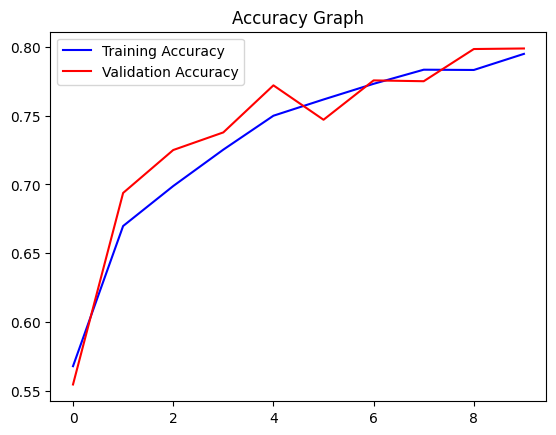

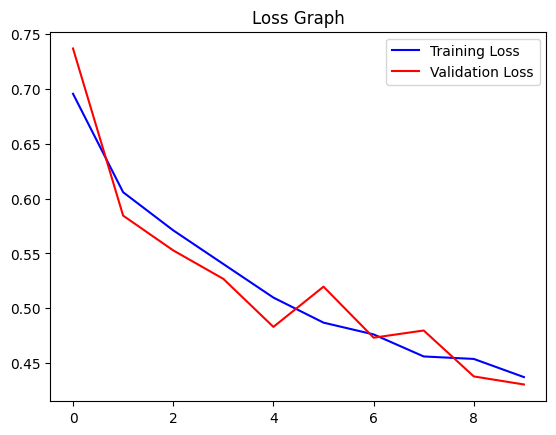

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()